#                                       WIN Prediction Analytics


##  Dependencies

In [71]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import warnings
warnings.filterwarnings('ignore')

##  Reading in the dataset 

In [72]:
os.chdir("C:\Python")

In [73]:
df = pd.read_csv('Win_Prediction_Data.csv')

In [74]:
df.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,01-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,03-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,24-May-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,03-Nov-11,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,17-Sep-12,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,11-Apr-12,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,17-Nov-11,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


## Exploratory Data Analysis (EDA)

In [75]:
df.info()                              # data set details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Client Category   9982 non-null   object 
 1   Solution Type     10061 non-null  object 
 2   Deal Date         10061 non-null  object 
 3   Sector            10061 non-null  object 
 4   Location          10061 non-null  object 
 5   VP Name           10061 non-null  object 
 6   Manager Name      10061 non-null  object 
 7   Deal Cost         10061 non-null  float64
 8   Deal Status Code  10061 non-null  object 
dtypes: float64(1), object(8)
memory usage: 707.5+ KB


In [76]:
df.describe()                           # describing the data set

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


In [77]:
df.isnull().sum()                      # check the missing values

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [78]:
df.nunique()                           # checking unique values in each column

Client Category       41
Solution Type         67
Deal Date           2555
Sector                25
Location              13
VP Name               43
Manager Name         278
Deal Cost           1469
Deal Status Code       2
dtype: int64

In [1]:
win1= df.dropna()                      # dropping null values 

NameError: name 'df' is not defined

In [80]:
win1.isnull().sum()         

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

In [81]:
# Renaming the columns

win1.rename(columns={"Client Category":"Client_Category","Solution Type":"Solution_Type","Deal Date":"Deal_Date","VP Name":"VP_Name","Manager Name":"Manager_Name","Deal Cost":"Deal_Cost","Deal Status Code":"Deal_Status_Code"},inplace= True)

In [82]:
list(win1.columns)

['Client_Category',
 'Solution_Type',
 'Deal_Date',
 'Sector',
 'Location',
 'VP_Name',
 'Manager_Name',
 'Deal_Cost',
 'Deal_Status_Code']

In [83]:
win1.Deal_Status_Code.replace(to_replace=['Won'],value=['1'],inplace=True)    # Creating dummies (replacing Won with value 1) 

In [84]:
win1.Deal_Status_Code.replace(to_replace=['Lost'],value=['0'],inplace=True)   # Creating dummies (replacing Lost with value 0)

In [85]:
win1.Deal_Status_Code.unique()

array(['1', '0'], dtype=object)

In [86]:
df.duplicated().sum()                # Finding the duplicates

14

In [87]:
win1[win1.duplicated()]              # Repeated values  

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
3036,Domestic Public Bank,Solution 32,20-Mar-15,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,0
3385,Tech,Solution 32,31-Jul-15,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,0
3880,Telecom,Solution 12,30-Aug-13,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,0
5037,Tech,Solution 13,08-May-12,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,0
7637,Govt,Solution 34,21-Feb-18,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,0
7705,Internal,Solution 9,06-Jan-15,Sector 20,Others,Sargar Deep Rao,Brenton Launius,2120294.12,0
7718,Services_based,Solution 26,11-Feb-18,Sector 17,L10,Molly Eakes,vansu dev,264705.88,0
8020,Internal,Solution 9,02-Jul-15,Sector 2,L9,Sargar Deep Rao,Rahul Kocher,264705.88,0
8167,Infrastructure,Solution 9,18-May-15,Sector 24,L10,Mervin Harwood,nahar singh,352941.18,0
8177,Services_based,Solution 9,03-Oct-15,Sector 23,L1,Ankita Aggarwal,bhagwati prasad,147058.82,0


In [88]:
win1.drop_duplicates()           # Dropped Duplicate values

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Internal,Solution 59,01-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
4,Internal,Solution 32,03-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,18-Mar-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0
10057,Internal,Solution 6,04-Mar-19,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,1
10058,Power ind,Solution 9,28-Feb-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,0
10059,Power ind,Solution 62,27-Jan-19,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,1


In [89]:
win1.Deal_Cost[win1['Deal_Cost'] < 1]        # checking Deal_Cost with zero values

79       0.0
95       0.0
139      0.0
150      0.0
210      0.0
        ... 
7886     0.0
7903     0.0
7907     0.0
7921     0.0
10005    0.0
Name: Deal_Cost, Length: 240, dtype: float64

In [90]:
win1.drop(win1[win1.Deal_Cost < 1].index, inplace=True)   # Dropping Deal_Cost < 1

In [91]:
win1.Deal_Cost[win1['Deal_Cost'] < 1]

Series([], Name: Deal_Cost, dtype: float64)

## Spliting Data into Train & Test 

In [92]:
x = win1.drop(['Deal_Status_Code'],axis=1)
y = win1['Deal_Status_Code']

In [93]:
x.head(10)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88
2,Internal,Solution 59,01-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00
4,Internal,Solution 32,03-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35
5,Internal,Solution 32,24-May-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35
6,Internal,Solution 59,03-Nov-11,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47
7,Govt,Solution 7,17-Sep-12,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88
8,Consumer Good,Solution 42,11-Apr-12,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94
9,Internal,Solution 59,17-Nov-11,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53


In [94]:
y.head(10)

0    1
1    1
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    0
Name: Deal_Status_Code, dtype: object

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=105)

In [96]:
print("orginal size",win1.shape,"\n train size", x_train.shape,"\n test size",x_test.shape)

orginal size (9742, 9) 
 train size (6819, 8) 
 test size (2923, 8)


In [97]:
x_train.shape,x_test.shape

((6819, 8), (2923, 8))

In [98]:
pip install category-encoders               # installing encoders 

Note: you may need to restart the kernel to use updated packages.


In [99]:
import category_encoders as ce

In [100]:
encoder = ce.OrdinalEncoder(cols=['Client_Category','Solution_Type','Deal_Date','Sector','Location','VP_Name','Manager_Name'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [101]:
x_train.head(10)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost
2453,1,1,1,1,1,1,1,373823.53
5191,2,2,2,2,2,2,2,323529.41
6070,3,3,3,1,1,3,3,30000.00
6841,4,4,4,3,2,2,4,352941.18
8024,3,5,5,1,3,2,5,337941.18
6723,5,6,6,4,4,4,6,470588.24
7777,4,5,7,5,2,2,7,441176.47
5238,6,2,8,5,5,5,8,1470.59
825,7,1,9,1,1,1,9,245882.35
9794,3,7,10,6,1,6,10,405882.35


In [102]:
x_test.head(10)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost
6184,4,6.0,1053.0,18,1,8.0,260.0,1029411.77
7487,11,13.0,626.0,9,1,1.0,86.0,764705.88
6734,11,11.0,1098.0,3,4,9.0,37.0,132352.94
25,15,11.0,864.0,3,4,3.0,80.0,647058.82
4625,3,7.0,1874.0,1,1,11.0,48.0,370588.24
3026,3,10.0,817.0,9,3,1.0,78.0,529411.77
8913,3,4.0,1344.0,3,2,19.0,66.0,56176.47
6347,15,4.0,347.0,3,2,18.0,40.0,735294.12
5942,16,4.0,1706.0,17,1,7.0,1.0,360294.12
8202,20,5.0,489.0,1,1,1.0,42.0,232058.82


## Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
#instantiate the DecisionTreeClassifier model with criterian gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
#fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [105]:
y_pred_gini = clf_gini.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score
print('Model accuracy with  gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy with  gini index: 0.6435


In [107]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array(['0', '0', '1', ..., '0', '0', '0'], dtype=object)

In [108]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6498


In [109]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.6498
Test set score: 0.6435


#### Training-set accuracy score for Decision Tree: 64.98%
#### Test-set accuracy score for Decision Tree: 64.35%


[Text(0.5, 0.9, 'X[7] <= 235000.0\ngini = 0.472\nsamples = 6819\nvalue = [4217, 2602]'),
 Text(0.25, 0.7, 'X[7] <= 3676.475\ngini = 0.498\nsamples = 1941\nvalue = [1027, 914]'),
 Text(0.125, 0.5, 'X[7] <= 1176.47\ngini = 0.061\nsamples = 96\nvalue = [93, 3]'),
 Text(0.0625, 0.3, 'X[1] <= 12.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.3, 'X[0] <= 3.5\ngini = 0.022\nsamples = 92\nvalue = [91, 1]'),
 Text(0.15625, 0.1, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.375, 0.5, 'X[7] <= 108088.234\ngini = 0.5\nsamples = 1845\nvalue = [934, 911]'),
 Text(0.3125, 0.3, 'X[0] <= 6.5\ngini = 0.471\nsamples = 570\nvalue = [216, 354]'),
 Text(0.28125, 0.1, 'gini = 0.397\nsamples = 249\nvalue = [68, 181]'),
 Text(0.34375, 0.1, 'gini = 0.497\nsamples = 321\nvalue = [148, 173]'),
 Tex

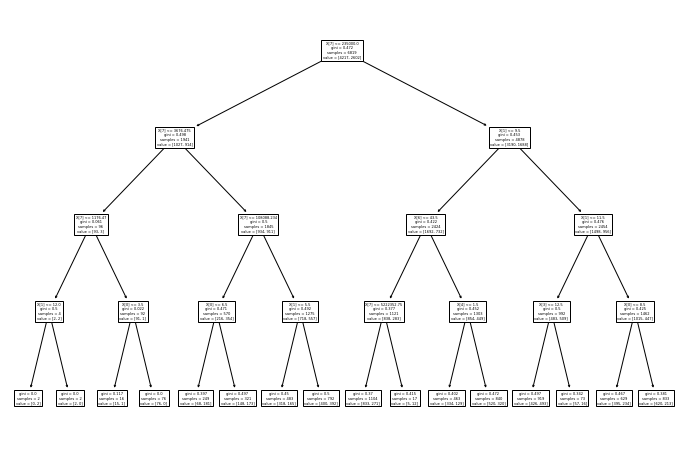

In [110]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train,y_train))

## Logisitic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [112]:
model.fit(x_train,y_train)

LogisticRegression()

In [113]:
x_test

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost
6184,4,6.0,1053.0,18,1,8.0,260.0,1029411.77
7487,11,13.0,626.0,9,1,1.0,86.0,764705.88
6734,11,11.0,1098.0,3,4,9.0,37.0,132352.94
25,15,11.0,864.0,3,4,3.0,80.0,647058.82
4625,3,7.0,1874.0,1,1,11.0,48.0,370588.24
...,...,...,...,...,...,...,...,...
807,8,14.0,2053.0,7,2,3.0,55.0,1470.59
8703,15,11.0,1486.0,3,10,18.0,40.0,323529.41
333,1,16.0,1342.0,1,1,1.0,63.0,1215000.00
6808,12,3.0,43.0,3,2,23.0,97.0,441176.47


In [114]:
y_test

6184    0
7487    0
6734    1
25      1
4625    1
       ..
807     1
8703    0
333     0
6808    0
2239    0
Name: Deal_Status_Code, Length: 2923, dtype: object

In [115]:
y_predicted = model.predict(x_test)

In [116]:
y_predicted

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [117]:
model.predict_proba(x_test)

array([[0.59405628, 0.40594372],
       [0.55901566, 0.44098434],
       [0.57966855, 0.42033145],
       ...,
       [0.61631239, 0.38368761],
       [0.51189131, 0.48810869],
       [0.63836093, 0.36163907]])

In [119]:
model.score(x_test,y_test)

0.6140951077659939

In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
cf_matrix = confusion_matrix(y_test, y_predicted)         # obtaining the confusion matrix
cf_matrix

array([[1795,    0],
       [1128,    0]], dtype=int64)

In [122]:
cf_matrix.flatten()

array([1795,    0, 1128,    0], dtype=int64)

<AxesSubplot:>

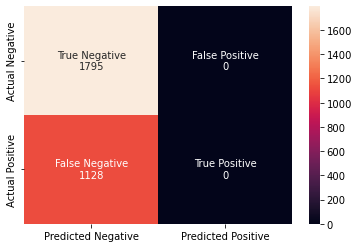

In [123]:
import numpy as np
import seaborn as sns
# preparing the labels
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(2,2)
axylabels = ['Actual Negative', 'Actual Positive']
axxlabels = ['Predicted Negative', 'Predicted Positive']

# plotting the heatmap
sns.heatmap(cf_matrix, annot=annotations, fmt='', xticklabels=axxlabels, yticklabels=axylabels)

In [136]:
tn = cf_matrix.flatten()[0] # true negative
fp = cf_matrix.flatten()[1] # false positive
fn = cf_matrix.flatten()[2] # false negative
tp = cf_matrix.flatten()[3] # true positive

acc = ((tp+tn)/(tp+fn+tn+fp))*100 # accuracy


print(str.format('Accuracy: {:.2f}%', acc))

Accuracy: 61.41%


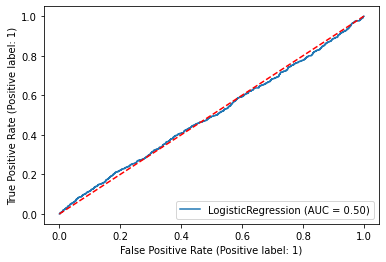

In [125]:
# plotting the  ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x_test, y_test)
plt.plot([0,1], [0,1],'r--')

## Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [127]:
y_hat =rf.predict(x_test)


#Printing the Accuarcy, Confusion Matrix and the Classification Report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


y_actu = pd.Series(y_test, name='Actual')
df_confusion = pd.crosstab(y_actu, y_hat)
acc = accuracy_score(y_test, y_hat, normalize=True)
print('Model Accuracy:%.2f'%acc)
print(df_confusion)
print(classification_report(y_test,y_hat))

Model Accuracy:0.77
col_0      0    1
Actual           
0       1632  163
1        518  610
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1795
           1       0.79      0.54      0.64      1128

    accuracy                           0.77      2923
   macro avg       0.77      0.72      0.73      2923
weighted avg       0.77      0.77      0.76      2923



In [128]:
y_pred = rf.predict(x_test)

In [129]:
y_pred

array(['0', '0', '1', ..., '0', '0', '0'], dtype=object)

In [130]:
x_test1 =x_test

In [131]:
x_test1.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost
6184,4,6.0,1053.0,18,1,8.0,260.0,1029411.77
7487,11,13.0,626.0,9,1,1.0,86.0,764705.88
6734,11,11.0,1098.0,3,4,9.0,37.0,132352.94
25,15,11.0,864.0,3,4,3.0,80.0,647058.82
4625,3,7.0,1874.0,1,1,11.0,48.0,370588.24


In [132]:
y_test1 = y_test

In [133]:
y_test1.head()

6184    0
7487    0
6734    1
25      1
4625    1
Name: Deal_Status_Code, dtype: object

In [134]:
x_test1['y_test1']=y_test
x_test1.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,y_test1
6184,4,6.0,1053.0,18,1,8.0,260.0,1029411.77,0
7487,11,13.0,626.0,9,1,1.0,86.0,764705.88,0
6734,11,11.0,1098.0,3,4,9.0,37.0,132352.94,1
25,15,11.0,864.0,3,4,3.0,80.0,647058.82,1
4625,3,7.0,1874.0,1,1,11.0,48.0,370588.24,1


In [135]:
x_test1['y_pred1']=y_pred
x_test1.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,y_test1,y_pred1
6184,4,6.0,1053.0,18,1,8.0,260.0,1029411.77,0,0
7487,11,13.0,626.0,9,1,1.0,86.0,764705.88,0,0
6734,11,11.0,1098.0,3,4,9.0,37.0,132352.94,1,1
25,15,11.0,864.0,3,4,3.0,80.0,647058.82,1,1
4625,3,7.0,1874.0,1,1,11.0,48.0,370588.24,1,1
